# ETF MACHINE LEARNING

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [3]:
from pycaret.regression import *

## Import Database

In [4]:
df = pd.read_csv(r'C:\Workbook\Funds\ETF.csv')

### CLEAN Database

In [5]:
df.isna().sum().sum()

47

In [6]:
df.dropna(inplace = True)

In [7]:
df.isna().sum().sum()

0

## REMOVE COLUMNS X-Y

In [8]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'investment_type', 'size_type', 'price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'net_asset_value', 'fund_yield', 'fund_return_ytd',
       'fund_return_1month', 'fund_return_3months', 'fund_return_1year',
       'fund_return_3years', 'fund_return_5years', 'fund_return_10years',
       'fund_alpha_3years', 'fund_alpha_5years', 'fund_alpha_10years',
       'fund_standard_deviation_3years', 'fund_standard_deviation_5years',
       'fund_standard_deviation_10years', 'fund_sharpe_ratio_3years',
       'fund_sharpe_ratio_5years', 'fund_sharpe_ratio_10years',
      

In [9]:
dfp = df[['price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'net_asset_value', 'fund_yield','fund_return_10years']]

## PYCARET

### CONFIGURATION

In [10]:
reg  =setup(dfp, target = 'fund_return_10years', session_id = 123, log_experiment = True, experiment_name = 'fund_analysis')

,Description,Value
0,session_id,123
1,Target,fund_return_10years
2,Original Data,"(511, 18)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(357, 17)"


## BEST MODEL ACCORDING TO PYCARET

In [12]:
best_model = compare_models(exclude =['lar','par'], fold = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.7435,15.7626,3.9491,0.5624,0.5155,0.6604,0.1620
rf,Random Forest Regressor,2.7366,16.5086,4.0467,0.5427,0.4909,0.6574,0.5940
et,Extra Trees Regressor,2.6837,17.1517,4.0988,0.5275,0.5079,0.6461,0.4780
gbr,Gradient Boosting Regressor,2.8688,17.3443,4.1500,0.5123,0.5244,0.7099,0.1660
ada,AdaBoost Regressor,3.4807,20.3665,4.4959,0.4427,0.5216,0.8125,0.1800
ridge,Ridge Regression,3.3848,21.0746,4.5767,0.4147,0.5803,0.8091,0.0320
en,Elastic Net,3.4675,21.7489,4.6464,0.3968,0.5776,0.8665,0.0300
br,Bayesian Ridge,3.5376,22.3432,4.7092,0.3814,0.5853,0.8945,0.0300
lasso,Lasso Regression,3.5325,22.3974,4.7151,0.3798,0.5855,0.8932,0.0300
omp,Orthogonal Matching Pursuit,3.9442,27.3320,5.2062,0.2527,0.5048,0.9540,0.0320


##  BEST MODEL - RANDOM FOREST

In [13]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7031,21.9997,4.6904,0.2606,0.5086,0.4398
1,2.8138,18.9947,4.3583,0.3164,0.5562,0.3453
2,2.3668,12.3591,3.5155,0.6967,0.4671,0.9548
3,2.3566,12.6957,3.5631,0.5512,0.4987,0.5115
4,2.5556,12.7225,3.5669,0.6515,0.5509,1.0567
5,1.5183,7.1827,2.6801,0.7707,0.3923,0.3060
6,2.9396,15.1039,3.8864,0.4479,0.5145,0.6092
7,3.3633,27.7573,5.2685,0.5144,0.7382,1.0044
8,2.2494,8.4205,2.9018,0.6904,0.4202,0.5651
9,3.0716,27.2165,5.2169,0.4719,0.6644,0.6665


## TUNE RANDOM EXTRA TREE REGRESSOR

In [14]:
tuned_et = tune_model(et, n_iter = 50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8034,22.9604,4.7917,0.2284,0.3778,0.5109
1,2.8569,17.9509,4.2369,0.3540,0.5067,0.3841
2,2.3467,13.0534,3.6129,0.6797,0.4285,0.9408
3,2.5459,12.5210,3.5385,0.5573,0.5123,0.5602
4,3.0327,16.3427,4.0426,0.5523,0.5682,1.2645
5,2.0626,10.2734,3.2052,0.6721,0.3633,0.4780
6,3.1126,16.0514,4.0064,0.4133,0.5286,0.6801
7,3.6079,32.8153,5.7285,0.4259,0.7053,1.2390
8,2.0230,6.8690,2.6209,0.7475,0.3755,0.5618
9,3.2735,29.3911,5.4214,0.4298,0.5794,0.7937


## VISUALISATION

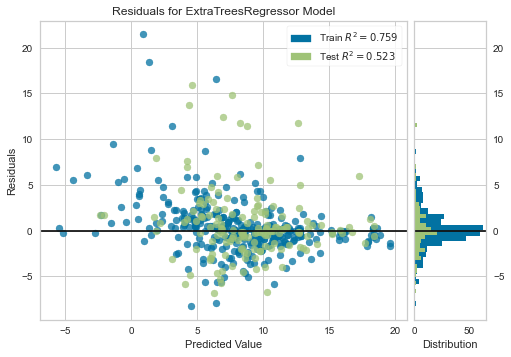

In [15]:
plot_model(tuned_et)

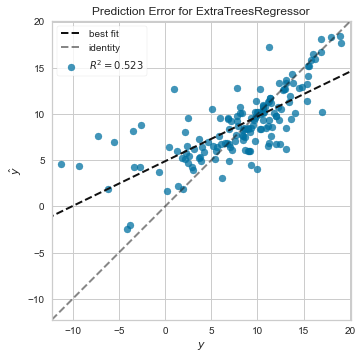

In [16]:
plot_model(tuned_et, plot = 'error')

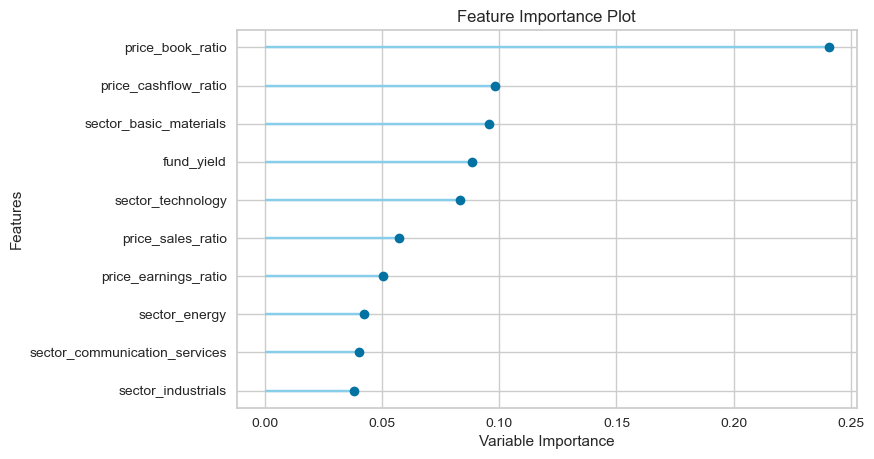

In [17]:
plot_model(tuned_et, plot = 'feature')

## EVALUATE MODEL

In [18]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## INTERPRETATION OF MODEL

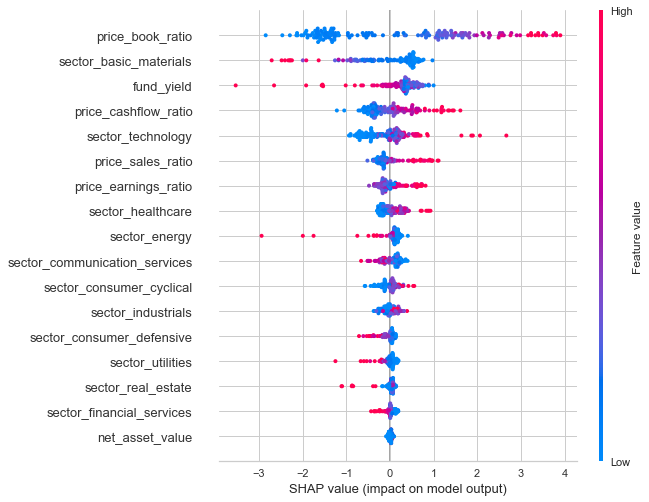

In [19]:
interpret_model(tuned_et)

## AUTO MACHINE LEARNING

In [20]:
auto_ml = automl(optimize = 'MAE')
print(auto_ml)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


## PREDICTIONS

In [21]:
pred = predict_model(auto_ml)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.0760,10.8499,3.2939,0.6564,0.4382,0.5809


In [22]:
rename_map = {'Label':'Predictions'}
pred.rename(columns = rename_map, inplace = True)
pred.head(5)

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,net_asset_value,fund_yield,fund_return_10years,Predictions
0,25.41,2.29,2.98,10.56,0.000000,0.00,0.000000,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.000000,3.840000e+09,1.55,10.55,10.9630
1,15.19,1.46,0.87,7.55,4.860000,8.25,25.040001,2.94,7.36,7.72,14.38,5.16,5.92,11.96,6.410000,6.278100e+08,2.25,8.42,7.7147
2,25.90,4.64,1.73,15.34,1.020000,7.13,8.340000,3.92,12.05,19.48,4.35,8.91,0.00,12.74,22.059999,2.499400e+08,1.20,10.55,10.5923
3,25.83,3.50,2.27,14.85,2.300000,11.34,12.780000,2.62,7.49,14.16,3.20,11.15,2.01,8.75,24.200001,2.094600e+11,1.94,12.96,11.8158
4,8.38,0.67,0.37,6.04,78.559998,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,3.65,17.790001,7.640000e+08,0.29,2.94,2.1326


## PREDICTIONS ON ALL DB

In [23]:
df1 = df.copy()

In [ ]:
#WILL REMOVE THE Y Column
#df1.drop(['fund_return_10years'], axis = 1 , inplace= True)

In [24]:
predictions = predict_model(auto_ml, data= df1)
predictions.head(10)

,fund_symbol,fund_extended_name,fund_family,inception_date,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,...,fund_standard_deviation_3years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_3years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,fund_treynor_ratio_3years,fund_treynor_ratio_5years,fund_treynor_ratio_10years,Label
0,1305,Daiwa ETF TOPIX,Daiwa Asset Management Co Ltd,2001-07-11,Blend,Large,12.92,1.18,0.81,5.41,...,14.38,14.75,16.89,0.34,0.59,0.60,3.92,8.01,9.29,9.2580
1,1306,Nomura TOPIX ETF,Nomura Asset Management Co Ltd,2001-07-11,Blend,Large,12.92,1.18,0.81,5.41,...,14.38,14.75,16.83,0.34,0.59,0.61,3.94,8.03,9.33,9.2700
2,1308,Nikko Exchange Traded Index TOPIX,Nikko Asset Management Co Ltd,2001-12-20,Blend,Large,12.92,1.18,0.81,5.44,...,14.38,14.75,16.90,0.34,0.59,0.60,3.93,8.03,9.31,9.2200
3,1310,Daiwa ETF TOPIX Core 30,Daiwa Asset Management Co Ltd,2002-03-28,Blend,Large,11.34,1.12,1.07,4.06,...,15.16,16.21,18.39,0.14,0.34,0.44,1.00,4.08,6.18,6.7000
4,1311,Nomura TOPIX Core 30 ETF,Nomura Asset Management Co Ltd,2002-04-02,Blend,Large,11.34,1.12,1.07,4.07,...,15.16,16.22,18.38,0.14,0.34,0.44,1.02,4.10,6.24,6.7000
5,1312,Russell/Nomura Small Cp Core IdxLnkd ETF,Nomura Asset Management Co Ltd,2007-10-22,Blend,Medium,14.48,1.08,0.66,5.68,...,14.16,13.34,15.80,0.48,0.80,0.76,6.07,10.80,11.71,8.6785
6,1313,KODEX 200,Samsung Asset Management Co Ltd,2002-10-11,Value,Large,7.04,0.97,0.66,5.15,...,11.98,11.07,15.40,0.39,0.05,0.44,4.04,-0.05,5.82,8.1800
7,1319,Nomura Nikkei 300 ETF,Nomura Asset Management Co Ltd,1995-04-12,Blend,Large,12.86,1.23,0.89,5.55,...,14.15,14.80,16.84,0.32,0.54,0.57,3.68,7.29,8.66,8.8200
8,1320,Daiwa ETF Nikkei 225,Daiwa Asset Management Co Ltd,2001-07-09,Growth,Large,15.52,1.66,1.07,9.04,...,15.30,15.44,18.08,0.46,0.64,0.71,5.83,9.13,11.58,12.0100
9,1321,Nomura Nikkei 225 ETF,Nomura Asset Management Co Ltd,2001-07-09,Growth,Large,15.85,1.69,1.09,9.22,...,15.30,15.44,18.02,0.46,0.64,0.71,5.80,9.10,11.59,11.9428


## NORMAL METHOD

In [25]:
df2 = pd.read_csv(r'C:\Workbook\Funds\ETF.csv')

In [26]:
df2.head(5)

,fund_symbol,fund_extended_name,fund_family,inception_date,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,...,fund_alpha_10years,fund_standard_deviation_3years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_3years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,fund_treynor_ratio_3years,fund_treynor_ratio_5years,fund_treynor_ratio_10years
0,1305,Daiwa ETF TOPIX,Daiwa Asset Management Co Ltd,2001-07-11,Blend,Large,12.92,1.18,0.81,5.41,...,0.35,14.38,14.75,16.89,0.34,0.59,0.60,3.92,8.01,9.29
1,1306,Nomura TOPIX ETF,Nomura Asset Management Co Ltd,2001-07-11,Blend,Large,12.92,1.18,0.81,5.41,...,0.38,14.38,14.75,16.83,0.34,0.59,0.61,3.94,8.03,9.33
2,1308,Nikko Exchange Traded Index TOPIX,Nikko Asset Management Co Ltd,2001-12-20,Blend,Large,12.92,1.18,0.81,5.44,...,0.36,14.38,14.75,16.90,0.34,0.59,0.60,3.93,8.03,9.31
3,1310,Daiwa ETF TOPIX Core 30,Daiwa Asset Management Co Ltd,2002-03-28,Blend,Large,11.34,1.12,1.07,4.06,...,-2.56,15.16,16.21,18.39,0.14,0.34,0.44,1.00,4.08,6.18
4,1311,Nomura TOPIX Core 30 ETF,Nomura Asset Management Co Ltd,2002-04-02,Blend,Large,11.34,1.12,1.07,4.07,...,-2.50,15.16,16.22,18.38,0.14,0.34,0.44,1.02,4.10,6.24


In [29]:
df2.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'investment_type', 'size_type', 'price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'net_asset_value', 'fund_yield', 'fund_return_ytd',
       'fund_return_1month', 'fund_return_3months', 'fund_return_1year',
       'fund_return_3years', 'fund_return_5years', 'fund_return_10years',
       'fund_alpha_3years', 'fund_alpha_5years', 'fund_alpha_10years',
       'fund_standard_deviation_3years', 'fund_standard_deviation_5years',
       'fund_standard_deviation_10years', 'fund_sharpe_ratio_3years',
       'fund_sharpe_ratio_5years', 'fund_sharpe_ratio_10years',
      

In [30]:
df2.dropna(inplace = True)

In [31]:
df2.isna().sum().sum()

0

In [32]:
X = df2[['price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology']]
X.head()

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology
0,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.44,7.05,1.96,4.95,1.7,20.29,14.61
1,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.43,7.06,1.96,4.95,1.7,20.29,14.62
2,12.92,1.18,0.81,5.44,7.74,17.33,11.57,3.22,9.53,7.07,1.99,4.98,1.7,20.23,14.62
3,11.34,1.12,1.07,4.06,2.41,14.25,16.26,1.74,7.93,4.55,0.00,15.52,2.0,16.26,19.06
4,11.34,1.12,1.07,4.07,2.44,14.26,16.25,1.74,7.91,4.56,0.00,15.52,2.0,16.32,18.99


In [34]:
y = df2[['fund_return_10years']]
y.sample(5)

,fund_return_10years
35,10.55
192,8.42
89,10.55
291,12.96
37,2.94


### TRAINING AND TESTING DATA

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### SCALING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

#### FITTING XTRAIN

In [ ]:
X_train = ss.fit_transform(X_train)

In [ ]:
X_test = ss.fit_transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

### MODEL 1 - Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predictions

In [40]:
predictions = lr.predict(X_test)

In [41]:
print(lr.intercept_)

[512.95947732]


In [65]:
lr.coef_[0]

array([-0.07743613,  0.62783112,  0.79013677,  0.02632423, -5.16002327,
       -5.00463355, -5.10355492, -5.09534794, -5.06365341, -5.02153824,
       -5.10515383, -5.09409284, -5.17616024, -5.04736159, -5.01592437])

In [76]:
index = X.columns
index.tolist()

['price_earnings_ratio',
 'price_book_ratio',
 'price_sales_ratio',
 'price_cashflow_ratio',
 'sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_healthcare',
 'sector_utilities',
 'sector_communication_services',
 'sector_energy',
 'sector_industrials',
 'sector_technology']

In [73]:
type(index)

pandas.core.indexes.base.Index

In [72]:
coef_list = lr.coef_
coef_list[0].tolist()

[-0.0774361349107203,
 0.6278311239957493,
 0.7901367676567813,
 0.026324225001970514,
 -5.160023273605469,
 -5.004633553095101,
 -5.10355491596818,
 -5.095347935252696,
 -5.063653411601111,
 -5.02153823661989,
 -5.105153829204246,
 -5.094092838983291,
 -5.176160237650976,
 -5.0473615937993745,
 -5.0159243740067625]

In [70]:
type(coef_list)

numpy.ndarray

In [85]:
#Convert the lr.coef_ into a list --> coef_list = [..]; convert the columns name into a list --> index =[X.columns]; name of the column = ['Coef
cdf = pd.DataFrame(data = coef_list.transpose(), index = index ,columns=['Coeff'])
cdf

,Coeff
price_earnings_ratio,-0.077436
price_book_ratio,0.627831
price_sales_ratio,0.790137
price_cashflow_ratio,0.026324
sector_basic_materials,-5.160023
sector_consumer_cyclical,-5.004634
sector_financial_services,-5.103555
sector_real_estate,-5.095348
sector_consumer_defensive,-5.063653
sector_healthcare,-5.021538


In [90]:
#USE %.2f for a float with 2 decimals, close the brackets then use % and brackets %(xxx))
print("the intercept or B is %.2f"     %(lr.intercept_))

the intercept or B is 512.96


Text(0, 0.5, 'Predicted values')

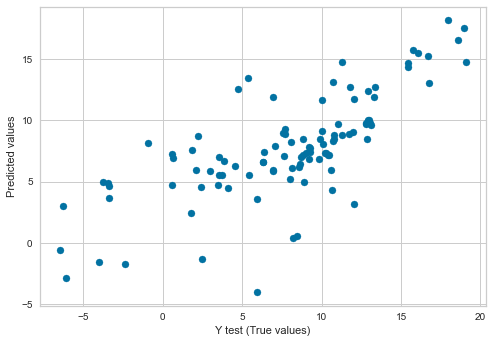

In [91]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True values)')
plt.ylabel ('Predicted values')

In [103]:
lr.score(X_test,y_test)

0.5330493485704025

#### EVALUATE SCORES

In [92]:
from sklearn import metrics

In [96]:
#or from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [93]:
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 3.0232087528085736
MSE 15.20881410169528
RMSE 3.8998479587921477


#### R2 SCORE

In [94]:
metrics.explained_variance_score(y_test,predictions)

0.5332971875344943

In [98]:
r2_score(y_test, predictions)

0.5330493485704025

<Figure size 720x720 with 0 Axes>

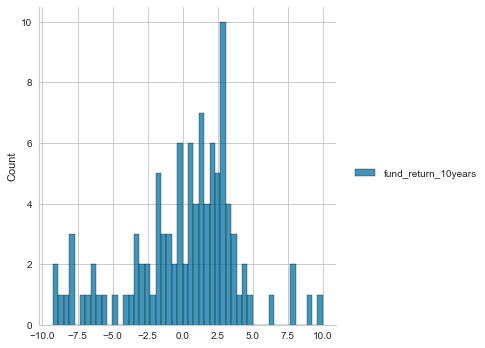

In [100]:
plt.figure(figsize =(10,10))
sns.displot((y_test - predictions), bins = 50)